In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [28]:
# Charger les données
chemain = "C:/Users/zineb/OneDrive/Bureau/hetic/DA/silver/data.csv"
df = pd.read_csv(chemain)

In [29]:
df.head()

,account,account_id,account_name,Somme de close_value,deal_stage,engage_at,manager,manager_id,Somme de number_of_employees,office_location,...,regional_office,Somme de revenue,sale_id,sales_agent,sales_price,sector,series,Somme de year_founded_at,sale_id.1,close_at
0,Isdom,f57d9881adfadb79106a99ae9557750e482ddc7475f554...,Isdom,NaN,Engaging,2017-06-12 00:00:00,Cara Losch,06938756f1fb89bc6dbbc22af77af80a8853ad11f49bbe...,4540,United States,...,East,3178.24,2fcd024e34a10bdb57b18c8c17bfe89a74d41f8d273260...,Violet Mclelland,1096.0,medical,GTX,2002,2fcd024e34a10bdb57b18c8c17bfe89a74d41f8d273260...,NaN
1,Isdom,f57d9881adfadb79106a99ae9557750e482ddc7475f554...,Isdom,NaN,Engaging,2017-08-23 00:00:00,Celia Rouche,6a3cf694f0c59ce6ae1994e9ad4f5a43032e6da7d9aef1...,4540,United States,...,West,3178.24,e8277a4173281241b1f3bf65bab23cbb405c3d14f6ff3c...,Vicki Laflamme,55.0,medical,MG,2002,e8277a4173281241b1f3bf65bab23cbb405c3d14f6ff3c...,NaN
2,Isdom,f57d9881adfadb79106a99ae9557750e482ddc7475f554...,Isdom,NaN,Engaging,2017-02-06 00:00:00,Celia Rouche,6a3cf694f0c59ce6ae1994e9ad4f5a43032e6da7d9aef1...,4540,United States,...,West,3178.24,2bdf2ba08108ba97809faee12f231da08650a3beac701c...,Hayden Neloms,55.0,medical,MG,2002,2bdf2ba08108ba97809faee12f231da08650a3beac701c...,NaN
3,Isdom,f57d9881adfadb79106a99ae9557750e482ddc7475f554...,Isdom,NaN,Engaging,2017-07-25 00:00:00,Melvin Marxen,76369295022d31eae9a71ae75f54abcecbb197f7333334...,4540,United States,...,Central,3178.24,667485fc32b9a675355ecc067aed50255e78f04f8d5a11...,Darcel Schlecht,NaN,medical,NaN,2002,667485fc32b9a675355ecc067aed50255e78f04f8d5a11...,NaN
4,Isdom,f57d9881adfadb79106a99ae9557750e482ddc7475f554...,Isdom,NaN,Engaging,2017-07-19 00:00:00,Melvin Marxen,76369295022d31eae9a71ae75f54abcecbb197f7333334...,4540,United States,...,Central,3178.24,667485fc32b9a675355ecc067aed50255e78f04f8d5a11...,Darcel Schlecht,5482.0,medical,GTX,2002,667485fc32b9a675355ecc067aed50255e78f04f8d5a11...,NaN


In [ ]:


# verification des colonnes engage_at et close_at sont au format datetime
df['engage_at'] = pd.to_datetime(df['engage_at'], errors='coerce')
df['close_at'] = pd.to_datetime(df['close_at'], errors='coerce')

# Calcul de la marge commerciale (sales_margin)
df['sales_margin'] = df['Somme de close_value'] - df['sales_price']

# Calcul de la durée du cycle de vente (sales_cycle_days)
df['sales_cycle_days'] = (df['close_at'] - df['engage_at']).dt.days

# Afficher les premières lignes pour vérifier
print(df[['Somme de close_value', 'sales_price', 'sales_margin', 'sales_cycle_days']].head())


   Somme de close_value  sales_price  sales_margin  sales_cycle_days
0                   NaN       1096.0           NaN               NaN
1                   NaN         55.0           NaN               NaN
2                   NaN         55.0           NaN               NaN
3                   NaN          NaN           NaN               NaN
4                   NaN       5482.0           NaN               NaN


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   account                       500 non-null    object        
 1   account_id                    500 non-null    object        
 2   account_name                  500 non-null    object        
 3   Somme de close_value          463 non-null    float64       
 4   deal_stage                    500 non-null    object        
 5   engage_at                     491 non-null    datetime64[ns]
 6   manager                       500 non-null    object        
 7   manager_id                    500 non-null    object        
 8   Somme de number_of_employees  500 non-null    int64         
 9   office_location               500 non-null    object        
 10  opportunity_id                500 non-null    object        
 11  product                       50

In [32]:
df.describe()

,Somme de close_value,engage_at,Somme de number_of_employees,Somme de revenue,sales_price,Somme de year_founded_at,close_at,sales_margin,sales_cycle_days
count,463.000000,491,500.0000,500.000000,412.000000,500.000000,463,386.000000,463.000000
mean,1505.483801,2017-06-18 10:48:08.798370560,8791.1020,4352.499280,2023.415049,1988.782000,2017-07-31 13:19:18.531317248,-869.295337,43.645788
min,0.000000,2016-10-25 00:00:00,3492.0000,1012.720000,55.000000,1980.000000,2017-03-01 00:00:00,-26768.000000,1.000000
25%,0.000000,2017-04-09 00:00:00,4540.0000,2403.580000,550.000000,1980.000000,2017-05-17 00:00:00,-550.000000,7.000000
50%,510.000000,2017-06-27 00:00:00,8801.0000,3178.240000,1096.000000,1986.000000,2017-08-02 00:00:00,-55.000000,17.000000
75%,3249.000000,2017-09-04 12:00:00,13756.0000,7708.380000,3393.000000,1994.000000,2017-10-10 12:00:00,9.000000,83.000000
max,6767.000000,2017-12-27 00:00:00,13756.0000,7708.380000,26768.000000,2002.000000,2017-12-31 00:00:00,1285.000000,137.000000
std,1999.883534,NaN,4078.8006,2569.190174,2551.753727,8.566285,NaN,2388.858102,41.139713


In [33]:
df.isnull().sum()

account                           0
account_id                        0
account_name                      0
Somme de close_value             37
deal_stage                        0
engage_at                         9
manager                           0
manager_id                        0
Somme de number_of_employees      0
office_location                   0
opportunity_id                    0
product                           0
product_id                        0
product_name                     88
regional_office                   0
Somme de revenue                  0
sale_id                           0
sales_agent                       0
sales_price                      88
sector                            0
series                           88
Somme de year_founded_at          0
sale_id.1                         0
close_at                         37
sales_margin                    114
sales_cycle_days                 37
dtype: int64

In [34]:
print(df.shape)
print(df.dtypes)
print(df.nunique())


(500, 26)
account                                 object
account_id                              object
account_name                            object
Somme de close_value                   float64
deal_stage                              object
engage_at                       datetime64[ns]
manager                                 object
manager_id                              object
Somme de number_of_employees             int64
office_location                         object
opportunity_id                          object
product                                 object
product_id                              object
product_name                            object
regional_office                         object
Somme de revenue                       float64
sale_id                                 object
sales_agent                             object
sales_price                            float64
sector                                  object
series                                  object
Som

In [35]:
df.columns

Index(['account', 'account_id', 'account_name', 'Somme de close_value',
       'deal_stage', 'engage_at', 'manager', 'manager_id',
       'Somme de number_of_employees', 'office_location', 'opportunity_id',
       'product', 'product_id', 'product_name', 'regional_office',
       'Somme de revenue', 'sale_id', 'sales_agent', 'sales_price', 'sector',
       'series', 'Somme de year_founded_at', 'sale_id.1', 'close_at',
       'sales_margin', 'sales_cycle_days'],
      dtype='object')

In [36]:
# Remplir les valeurs manquantes dans les colonnes numériques


df['sales_cycle_days'] = df['sales_cycle_days'].fillna(df['sales_cycle_days'].mean())
df['Somme de close_value'] = df['Somme de close_value'].fillna(df['Somme de close_value'].mean())
#df = df.dropna(subset=['sales_margin'])
df['sales_margin'] = df['sales_margin'].fillna(df['sales_margin'].mean())


In [38]:
# Supprimer les colonnes non pertinentes
df = df.drop(columns=['deal_stage', 'account_id', 'account_name', 'opportunity_id', 'sale_id','engage_at', 'product_id', 'product_name', 'sale_id', 
                     'Somme de close_value', 'Somme de year_founded_at', 'sale_id.1', 'close_at', 'manager_id'])


In [39]:
df.columns

Index(['account', 'manager', 'Somme de number_of_employees', 'office_location',
       'product', 'regional_office', 'Somme de revenue', 'sales_agent',
       'sales_price', 'sector', 'series', 'sales_margin', 'sales_cycle_days'],
      dtype='object')

In [40]:
# Encoder les colonnes catégoriques avec LabelEncoder
label_encoders = {}
cat_columns = ['sector', 'product', 'sales_agent', 'regional_office', 'series', 'office_location', 'account', 'manager']

for col in cat_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le



In [41]:
print(df)

print(df.columns)

     account  manager  Somme de number_of_employees  office_location  product  \
0          1        0                          4540                1        2   
1          1        1                          4540                1        6   
2          1        1                          4540                1        6   
3          1        3                          4540                1        4   
4          1        3                          4540                1        3   
..       ...      ...                           ...              ...      ...   
495        2        5                         13756                1        2   
496        2        5                         13756                1        2   
497        2        5                         13756                1        4   
498        2        5                         13756                1        1   
499        2        5                         13756                1        3   

     regional_office  Somme

In [42]:
# Sélectionner les caractéristiques (features) et la cible
X = df.drop(columns=['sales_margin'])
y = df['sales_margin']



In [55]:
X

,account,manager,Somme de number_of_employees,office_location,product,regional_office,Somme de revenue,sales_agent,sales_price,sector,series,sales_cycle_days
0,1,0,4540,1,2,1,3178.24,27,1096.0,1,1,43.645788
1,1,1,4540,1,6,2,3178.24,26,55.0,1,2,43.645788
2,1,1,4540,1,6,2,3178.24,11,55.0,1,2,43.645788
3,1,3,4540,1,4,0,3178.24,6,NaN,1,3,43.645788
4,1,3,4540,1,3,0,3178.24,6,5482.0,1,1,43.645788
...,...,...,...,...,...,...,...,...,...,...,...,...
495,2,5,13756,1,2,2,7708.38,29,1096.0,3,1,69.000000
496,2,5,13756,1,2,2,7708.38,14,1096.0,3,1,7.000000
497,2,5,13756,1,4,2,7708.38,29,NaN,3,3,11.000000
498,2,5,13756,1,1,2,7708.38,15,550.0,3,1,2.000000


In [43]:
# Normaliser les caractéristiques numériques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [44]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [45]:
# Modèle de régression
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [46]:
# Prédiction et évaluation
y_pred = model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 612.5628580742658
R² Score: 0.10374214854837005


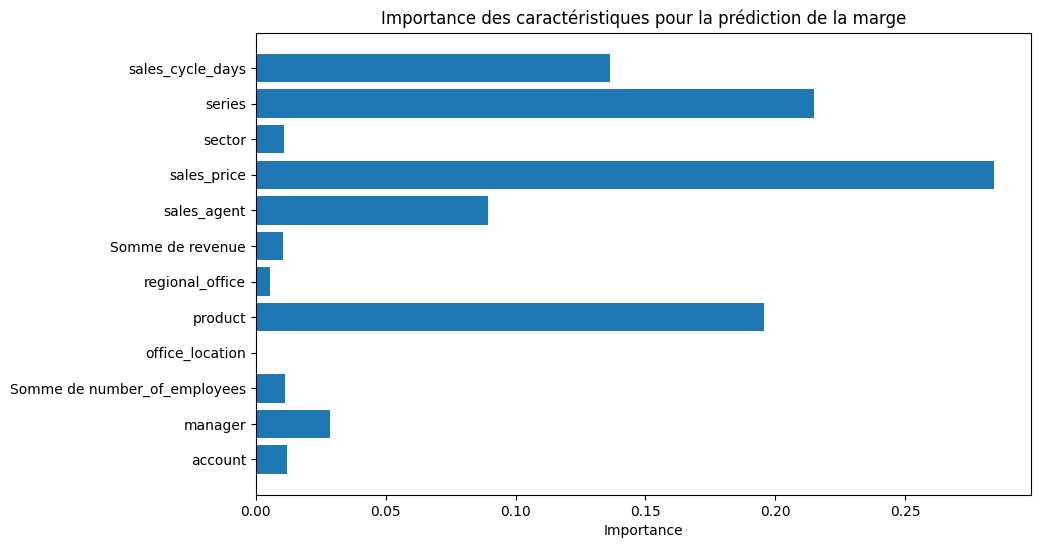

In [47]:

# Importance des caractéristiques
importances = model.feature_importances_
features = X.columns

# Graphique des importances
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel("Importance")
plt.title("Importance des caractéristiques pour la prédiction de la marge")
plt.show()


In [ ]:
# Prédictions pour de nouvelles données
new_data = X_test[:5]  # un échantillon des données de test
predictions = model.predict(new_data)

# Arrondir les prédictions pour une lecture plus lisible
predictions_rounded = np.round(predictions, 2) 
# Désactiver la notation scientifique dans Numpy
np.set_printoptions(suppress=True, precision=2)

# Affichage des prédictions
print("Prédictions sur nouvelles données (simulées):", predictions_rounded)

Prédictions sur nouvelles données (simulées): [-862.92 -939.47 -359.39 -495.28 -845.32]


In [49]:
# Vérification de la fiabilité avec des métriques supplémentaires
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 1175024.0902245282
Root Mean Squared Error: 1083.985281368953


In [50]:
# Analyse des produits et des secteurs les plus rentables
# Ajouter les prédictions au dataframe pour l'analyse
df_test = pd.DataFrame(X_test, columns=[col for col in df.columns if col in X.columns])
df_test['predicted_margin'] = y_pred

In [51]:
df_test.columns


Index(['account', 'manager', 'Somme de number_of_employees', 'office_location',
       'product', 'regional_office', 'Somme de revenue', 'sales_agent',
       'sales_price', 'sector', 'series', 'sales_cycle_days',
       'predicted_margin'],
      dtype='object')

In [52]:
df_test.dtypes

account                         float64
manager                         float64
Somme de number_of_employees    float64
office_location                 float64
product                         float64
regional_office                 float64
Somme de revenue                float64
sales_agent                     float64
sales_price                     float64
sector                          float64
series                          float64
sales_cycle_days                float64
predicted_margin                float64
dtype: object

In [54]:
df_test

,account,manager,Somme de number_of_employees,office_location,product,regional_office,Somme de revenue,sales_agent,sales_price,sector,series,sales_cycle_days,predicted_margin
0,0.380329,0.846878,1.218464,0.351562,0.349909,0.178746,1.307510,-1.026329,NaN,1.184574,1.738397,-0.876099,-862.920570
1,-0.484055,-0.442130,-1.043287,0.351562,-0.778829,-0.981941,-0.457512,0.243880,-0.363884,-0.502854,-0.891553,0.691715,-939.470000
2,0.380329,1.491382,1.218464,0.351562,-1.343197,1.339432,1.307510,0.128407,-0.578115,1.184574,-0.891553,-0.825524,-359.392500
3,1.244714,-1.086633,-1.300483,-2.844452,0.914277,1.339432,-1.301237,0.359354,0.537376,0.340860,0.423422,0.000000,-495.281347
4,-0.484055,0.202374,-1.043287,0.351562,0.349909,-0.981941,-0.457512,-0.910855,NaN,-0.502854,1.738397,-0.901386,-845.316477
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.380329,-1.086633,1.218464,0.351562,-0.214460,1.339432,1.307510,0.359354,1.357024,1.184574,-0.891553,1.020450,-2263.709534
96,-0.484055,-0.442130,-1.043287,0.351562,-0.778829,-0.981941,-0.457512,0.705774,-0.363884,-0.502854,-0.891553,0.894013,-243.080000
97,-0.484055,-0.442130,-1.043287,0.351562,0.914277,-0.981941,-0.457512,-1.257276,0.537376,-0.502854,0.423422,-0.901386,-1470.765000
98,0.380329,-1.086633,1.218464,0.351562,0.914277,1.339432,1.307510,0.359354,0.537376,1.184574,0.423422,0.742289,-1346.598860


In [53]:
# Calculer la rentabilité moyenne par secteur et par produit
rentability_by_sector = df_test.groupby([col for col in df.columns if 'sector' in col])['predicted_margin'].mean()
rentability_by_product = df_test.groupby([col for col in df.columns if 'product' in col])['predicted_margin'].mean()

print("\nRentabilité moyenne par secteur (prédictions):")
print(rentability_by_sector)
print("\nRentabilité moyenne par produit (prédictions):")
print(rentability_by_product)


Rentabilité moyenne par secteur (prédictions):
sector
-1.346567   -904.585655
-0.502854   -662.376257
 0.340860   -645.915913
 1.184574   -626.806410
Name: predicted_margin, dtype: float64

Rentabilité moyenne par produit (prédictions):
product
-1.343197    -259.973218
-0.778829    -384.162229
-0.214460   -1168.670873
 0.349909    -910.497802
 0.914277   -1226.077461
 1.478646    -135.268912
Name: predicted_margin, dtype: float64


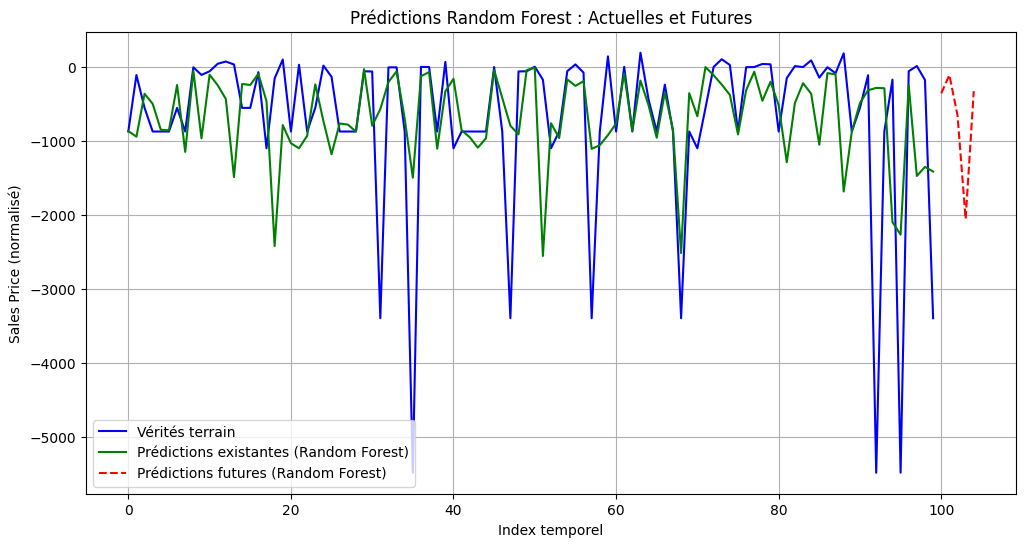

In [56]:


# Génération de nouvelles données simulées
future_data = pd.DataFrame({
    'account': [1, 2, 1, 2, 1],
    'manager': [3, 5, 1, 2, 4],
    'Somme de number_of_employees': [4540, 13756, 4540, 13756, 4540],
    'office_location': [1, 1, 1, 1, 1],
    'product': [2, 6, 3, 4, 1],
    'regional_office': [1, 2, 0, 2, 2],
    'Somme de revenue': [3178.24, 7708.38, 3178.24, 7708.38, 3178.24],
    'sales_agent': [27, 29, 11, 15, 6],
    'sales_price': [1096.0, 1096.0, 55.0, 5482.0, 550.0],
    'sector': [1, 3, 1, 3, 3],
    'series': [1, 1, 2, 3, 1],
    'sales_cycle_days': [43.65, 69.0, 43.65, 2.0, 11.0]
})

# Normaliser les nouvelles données
future_data_scaled = scaler.transform(future_data)

# Prédictions pour les nouvelles données
future_predictions = model.predict(future_data_scaled)

# Tracer les résultats
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label="Vérités terrain", color="blue")
plt.plot(range(len(y_test)), y_pred, label="Prédictions existantes (Random Forest)", color="green")
plt.plot(range(len(y_test), len(y_test) + len(future_predictions)), future_predictions, 
         label="Prédictions futures (Random Forest)", color="red", linestyle='--')

plt.xlabel("Index temporel")
plt.ylabel("Sales Price (normalisé)")
plt.title("Prédictions Random Forest : Actuelles et Futures")
plt.legend()
plt.grid()
plt.show()
